In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[164.5  153.5  159.5 ]
   [161.5  150.5  156.5 ]
   [156.5  145.5  151.5 ]
   ...
   [152.75 141.75 145.75]
   [143.25 132.25 136.25]
   [140.25 129.25 133.25]]

  [[161.5  150.5  156.5 ]
   [165.5  154.5  160.5 ]
   [152.   141.   147.  ]
   ...
   [152.25 141.25 145.25]
   [152.75 141.75 145.75]
   [152.5  141.5  145.5 ]]

  [[158.75 147.75 153.75]
   [172.25 161.25 167.25]
   [169.25 158.25 164.25]
   ...
   [165.   154.   158.  ]
   [163.5  152.5  156.5 ]
   [171.5  160.5  164.5 ]]

  ...

  [[149.75 137.75 137.75]
   [153.   141.   141.  ]
   [159.   147.   147.  ]
   ...
   [144.5  130.5  130.5 ]
   [138.25 124.25 124.25]
   [153.75 139.75 139.75]]

  [[142.75 130.75 130.75]
   [147.5  135.5  135.5 ]
   [155.25 143.25 143.25]
   ...
   [144.25 130.25 130.25]
   [151.5  137.5  137.5 ]
   [143.5  129.5  129.5 ]]

  [[150.25 138.25 138.25]
   [145.25 133.25 133.25]
   [144.   132.   132.  ]
   ...
   [152.25 138.25 138.25]
   [141.75 127.75 127.75]
   [145.75 131.75 13

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))



In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [18]:
import tensorflow as tf
from tensorflow import keras


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1196s 542ms/step - accuracy: 0.4106 - loss: 2.0934 - val_accuracy: 0.8660 - val_loss: 0.4290
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1109s 505ms/step - accuracy: 0.8431 - loss: 0.4971 - val_accuracy: 0.9207 - val_loss: 0.2517
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1083s 493ms/step - accuracy: 0.9050 - loss: 0.2949 - val_accuracy: 0.9277 - val_loss: 0.2257
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1128s 513ms/step - accuracy: 0.9386 - loss: 0.1904 - val_accuracy: 0.9497 - val_loss: 0.1550
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1087s 495ms/step - accuracy: 0.9553 - loss: 0.1361 - val_accuracy: 0.9562 - val_loss: 0.1334
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1085s 494ms/step - accuracy: 0.9629 - loss: 0.1123 - val_accuracy: 0.9480 - val_loss: 0.1691
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1108s 504ms/step - accuracy: 0.9711 - loss: 0.0871 - val_accuracy: 0.9624 - val_loss: 0.1196
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1095s 499ms/s

In [21]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 264s 120ms/step - accuracy: 0.9832 - loss: 0.0542


In [22]:
print(train_loss,train_acc)

0.05300087481737137 0.9838395118713379


In [23]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 65s 117ms/step - accuracy: 0.9561 - loss: 0.1424


In [24]:
print(val_loss,val_acc)

0.14260932803153992 0.9579444527626038


In [25]:
model.save("trained_model.keras")

In [26]:
training_history.history

{'accuracy': [0.6103421449661255,
  0.8650686144828796,
  0.914631187915802,
  0.941973090171814,
  0.9567679166793823,
  0.965772807598114,
  0.9724588990211487,
  0.976456344127655,
  0.978704035282135,
  0.9823884963989258],
 'loss': [1.3232744932174683,
  0.42551833391189575,
  0.26383793354034424,
  0.17999455332756042,
  0.1311759203672409,
  0.10391663759946823,
  0.08403634279966354,
  0.07448741793632507,
  0.06308085471391678,
  0.057129621505737305],
 'val_accuracy': [0.8660368919372559,
  0.9206692576408386,
  0.9276690483093262,
  0.9496926665306091,
  0.9561802744865417,
  0.9479854106903076,
  0.9623833298683167,
  0.9607329964637756,
  0.9681311249732971,
  0.9579444527626038],
 'val_loss': [0.42897769808769226,
  0.2516796588897705,
  0.22565969824790955,
  0.15497128665447235,
  0.1334449052810669,
  0.16911262273788452,
  0.11963451653718948,
  0.12707078456878662,
  0.11041576415300369,
  0.1426091492176056]}

In [27]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [28]:
training_history.history['val_accuracy']

[0.8660368919372559,
 0.9206692576408386,
 0.9276690483093262,
 0.9496926665306091,
 0.9561802744865417,
 0.9479854106903076,
 0.9623833298683167,
 0.9607329964637756,
 0.9681311249732971,
 0.9579444527626038]

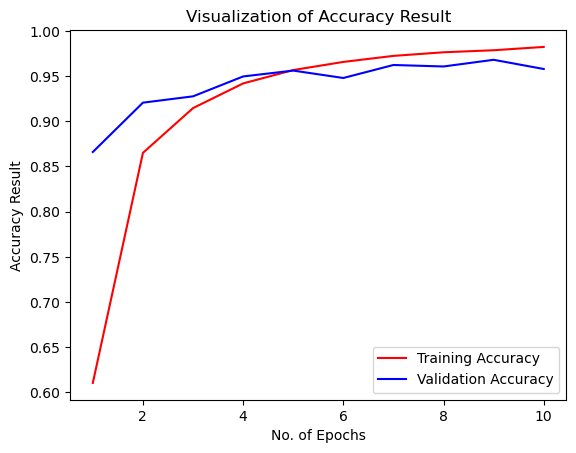

In [29]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [30]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 64s 116ms/step


(array([[1.0000000e+00, 1.7808895e-10, 2.2192331e-14, ..., 2.6369049e-20,
         4.2041468e-19, 1.9321266e-18],
        [9.9999976e-01, 6.4607967e-08, 2.2498787e-12, ..., 2.8576158e-15,
         6.2571530e-14, 1.4920580e-14],
        [1.0000000e+00, 2.9502822e-09, 7.5775072e-12, ..., 1.1676498e-19,
         1.8030728e-16, 1.8298175e-14],
        ...,
        [2.8869411e-12, 3.6366780e-12, 2.9490993e-10, ..., 2.9043773e-12,
         2.6384099e-12, 1.0000000e+00],
        [2.4867351e-11, 1.3239558e-12, 4.7278709e-10, ..., 2.1660037e-12,
         1.5691863e-12, 9.9999988e-01],
        [1.7515301e-15, 6.4445274e-16, 8.9072227e-16, ..., 2.4296317e-18,
         2.3133552e-16, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [33]:
predicted_categories = tf.argmax(y_pred,axis=1)


In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [36]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.96      0.95       504
                                 Apple___Black_rot       0.93      1.00      0.96       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.98       440
                                   Apple___healthy       0.96      0.97      0.97       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.92      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.95      0.

In [39]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[483,   7,   0, ...,   0,   0,   0],
       [  0, 496,   0, ...,   0,   0,   0],
       [  1,   1, 422, ...,   0,   3,   0],
       ...,
       [  0,   0,   0, ..., 484,   1,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   0, ...,   0,   0, 475]], dtype=int64)

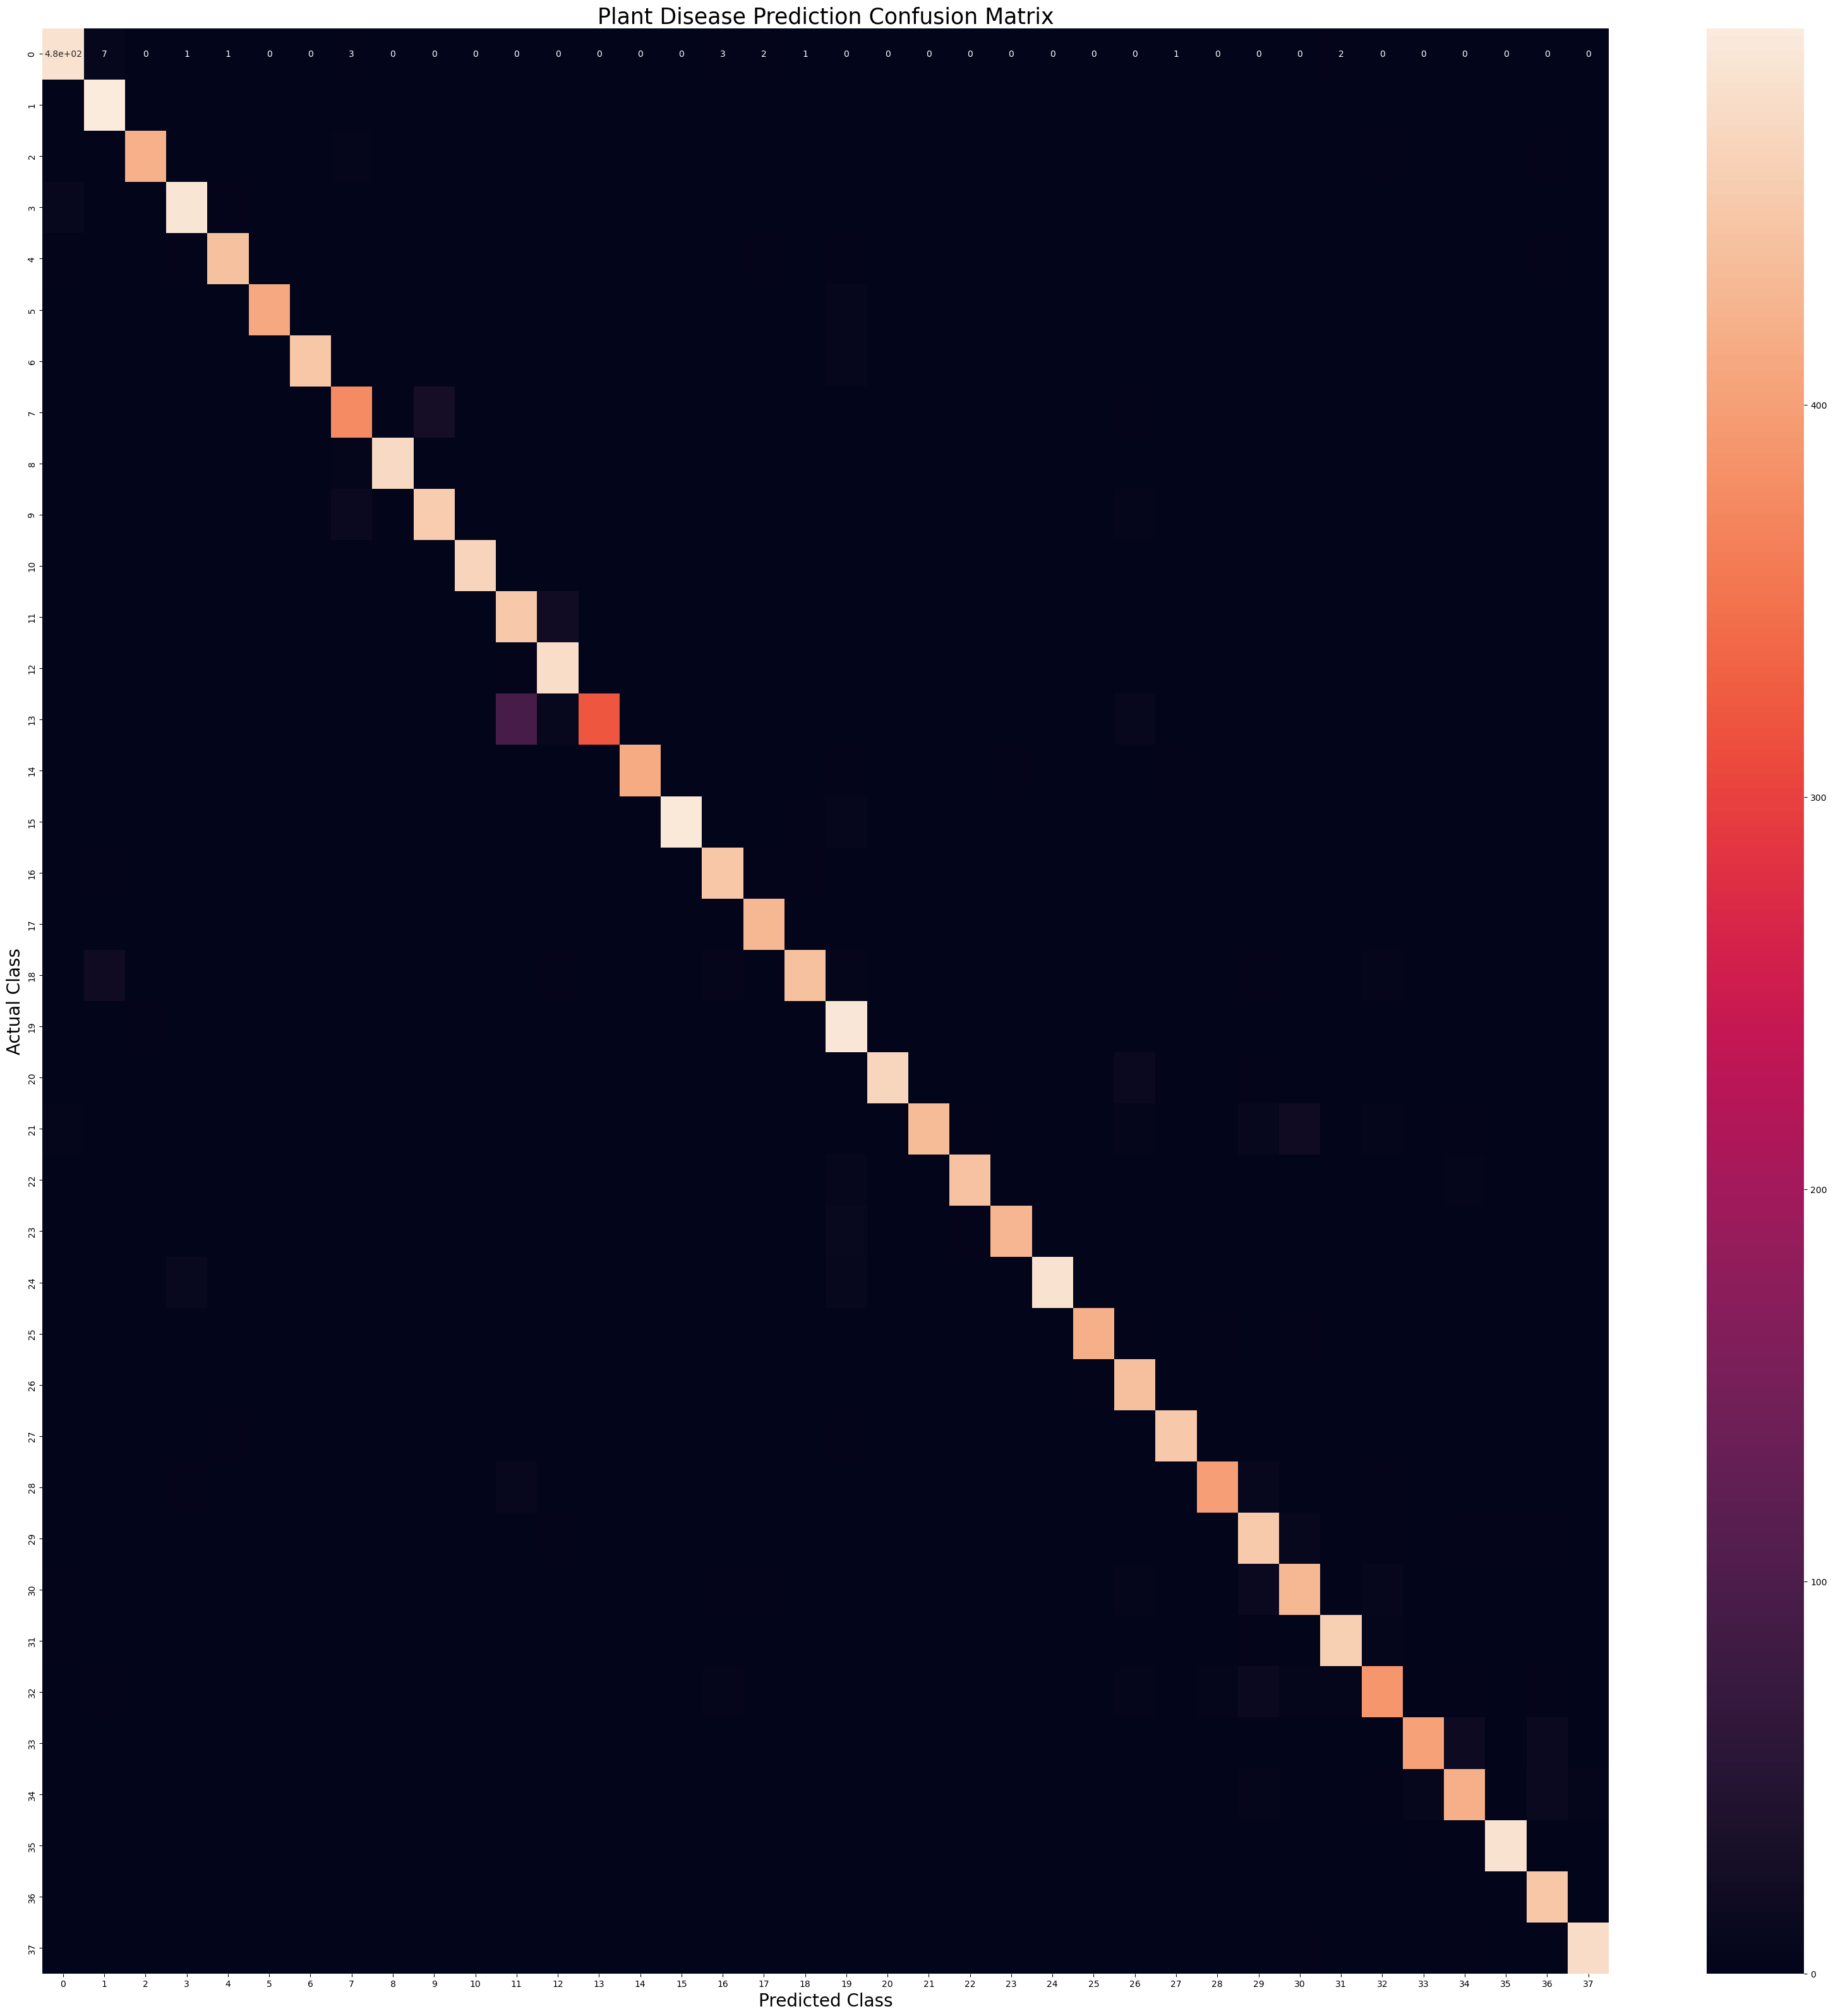

In [40]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()